# Computational Methods in Economics

## Problem Set 6 - Function Approximation 

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-01-10 16:39:11.999925


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa

**Note**: The last command imports the **funapprox_cme** module, which contains the functions defined in the lecture. The Python-file **funapprox_cme.py** which can be downloaded from LSF must be saved in the same folder as this notebook.

## Question 1 (N)

Construct the 5- and 50-degree approximants for the function $f(x) = \exp(-x^2)$ on the interval $[0, 2]$ using each of the following interpolation schemens:

(a) Equally spaced nodes, monomial basis

(b) Chebyshev nodes, Chebyshev basis

For each scheme and degree of approximation, plot the approximation error.

## Question 2 (N)

This question illustrates why we should use Chebyshev nodes instead of equally spaced (equidistant) nodes. We use *Runge's function* as an example:

\begin{equation}
    f(x) = \frac{1}{1 + \alpha x^2}
\end{equation}

Approximate this function on the interval $[-5, 5]$ using all possible combinations of equally spaced/Chebyshev nodes for the interpolation grid and monomials/Chebyshev polynomials for the basis functions. What choice has a bigger impact on the approximation error?

## Question 3 (N)

In lecture 5, we have solved the neoclassical growth model. As a reminder, here is a concise description of the model: 

- Utility function:

\begin{equation}
    u(c, h) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h^{1+\eta}}{1+\eta}
\end{equation}

with $c$ denoting consumption and $h$ labor supply.

- Production function:

\begin{equation}
    f(k, h) = A k^\alpha h^{1-\alpha}
\end{equation}
with $k$ denoting the capital stock, and $A$ the productivity level.

- Resource Constraint:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t
\end{equation}

- Planner's Problem:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}
s.t. the resource constraint.

In this question, we want to approximate the *value function* $V$, which is defined as the objective function - here lifetime utility of the representative agent - evaluated at the *optimal* sequences for capital and labor supply, $(k^*_t, h^*_t)_{t = 0}^\infty$ (and hence, via the resource constraint, optimal consumption). The value function in period 0 is a function of the initial capital stock $k_0$; in order to be feasible, any optimal sequence must satisfy $k^*_0 = k_0$:

\begin{equation}
    V(k_0) = \sum^\infty_{t = 0} \beta^t u[f(k^*_t, h^*_t) + (1 - \delta) k^*_t - k^*_{t+1}, h^*_t] 
\end{equation}

To find $V$, implement the following steps:

(i) Create a grid for the initial capital stock $k_0$ consisting of $m$ nodes. Solve the neoclassical growth above for each of these $m$ values for $k_0$. Store the resulting values $V_i = V(k_{0, i})$ in a Numpy array.

(ii) Using the data $\{V_i, k_{0,i}\}_{i = 1}^m$, approximate the function $V$. Use both an interpolation and a regression scheme and compare the approximated values for $k_0 = 0.66$ with the true value. 


## Question 4 (N)

In the lecture, we have approximated the Cobb-Douglas production function with two arguments using a tensor product Chebyshev basis. Repeat this exercise with a complete set of Chebyshev polynomials. Try different values for the total degree $l$ and plot the approximation errors.

**Hint**: You can implement the regression step with the function **chebapprox_2d** that was defined in the lecture, by adding a single line!

## Question 5 (N)

The simplest approach to approximating a univariate function $f$ is (piecewise) linear interpolation. As before, define a grid $x_1, ..., x_m$ and compute the function values $f(x_1), ... , f(x_m)$. Then, to approximate $f(x)$, find the two grid points $x_i$ and $x_{i+1}$ that bracket $x$, i.e. such that $x_l \equiv x_i \le x \le x_{i + 1} \equiv x_r $. The interpolant is given by:

\begin{equation}
    \hat{f}(x)=f(x_{l})+{\frac {f(x_{r})-f(x_{l})}{x_{r}-x_{l}}}(x-x_{l})
\end{equation}

(a) Write a function **lin_int** that takes three arguments - a scalar **x** at which to approximate the function, an array **X** consisting of $m$ grid points and an array **Y** containing the function values corresponding to the grid - and that implements this interpolation scheme. Use this function to approximate the sine function $f(x) = \sin(x)$ between 0 and $2\pi$. Compare your result to Numpy's **interp** function. Plot both the approximated and the true function values.

**Hint**: The slightly tricky part here is to find $x_l$ and $x_r$. There are different ways to achieve this; one possibility is Numpy's **argwhere** function. You may want to combine this with a **try/except** statement.

(b) Compute the maximum interpolation error when using linear interpolation on a dense grid between 0 and $2\pi$. Compare this to using Chebyshev interpolation. 

## Question 6 (N)

This question illustrates the use of interpolation for given grid points. Suppose you have information on some climate indicator, for example the number of hours of sunshine per year, for a finite set of locations, here indexed by latitude and longitude:

Stockholm - 1821 - (59.329444, 18.068611)

Copenhagen - 1539 - (55.676111, 12.568333)

Berlin - 1626 - (52.516667, 13.388889)

Vienna - 1884 - (48.2, 16.366667)

Zagreb - 1913 - (45.816667, 15.983333)

Rome - 2473 - (41.9, 12.5)

The first value gives the annual amount of sunshine, taken from https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration; the tuple contains the latitude and longitude of the corresponding city. This data is captured by the following Numpy array:

Text(0.5,0,'Latitude')

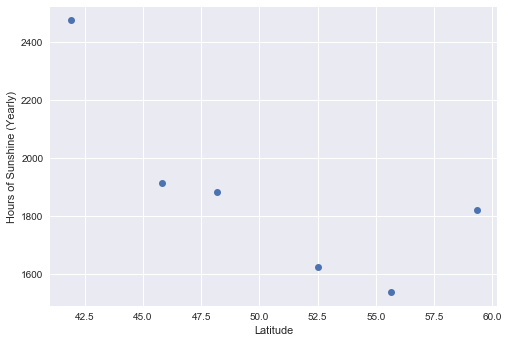

In [3]:
D = np.array([[59.329444, 18.068611, 1821],
              [55.676111, 12.568333, 1539],
              [52.516667, 13.388889, 1626],
              [48.2, 16.366667, 1884],
              [45.816667, 15.983333, 1913],
              [41.9, 12.5, 2473]])

fig, ax = plt.subplots()
ax.plot(D[:,0], D[:,2], 'o')
ax.set_ylabel('Hours of Sunshine (Yearly)')
ax.set_xlabel('Latitude')

(a) Use this data to find a (univariate) function $\hat{f}$ that maps hours of sunshine per year to latitude. We can use this function to predict annual sunshine duration for cities that are not contained in the sample. For example, Prague is represented by the following data:

In [4]:
prague = np.array([50.083333, 14.416667, 1668])

Does $\hat{f}$  over- or underpredict the amount of sunshine in Prague?

(b) Suppose we also include longitude as an explanatory variable in $\hat{f}$. Does this increase or decrease the interpolation error for yearly sunshine duration in Prague? 